In [20]:
import librosa
import numpy as np
import os
import pandas as pd
import librosa
import glob 


In [24]:
from librosa import display as disp

In [29]:
from IPython.display import Audio as audio

In [113]:
musicFolder = r'C:\Users\jokemjaa\Music\Various Artists'
album = r'Eyes Wide Shut'
# album = 
track = r'02 Shostakovich- Suite #2 For Jazz Orchestra - Waltz #2.wav'
audioFile = f"{musicFolder}\\{album}\\{track}"
y, sr = librosa.load(audioFile)
# data, sampling_rate = librosa.load(r'C:\Users\jokemjaa\Music\Various Artists\Sounds Of Horror\37 Woman Screaming.wav')
# y, sr = librosa.load(r'C:\Users\jokemjaa\Music\Darude\BeforeTheStorm\Sandstorm.wav')
# C:\Users\jokemjaa\Music\Darude\Before The Storm
# 

In [17]:
y, sr = myrecording[:,1], 44100

In [79]:
sampling_rate

22050

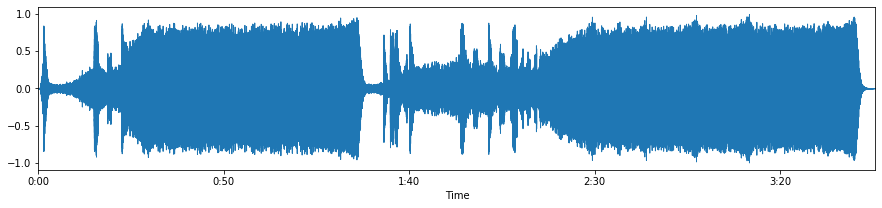

In [158]:
plt.figure(figsize = (15, 3))
disp.waveplot(data, sampling_rate)

In [21]:
C = librosa.cqt(y, sr)

In [22]:
C.shape

(84, 431)

C:\Users\jokemjaa\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\core\spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


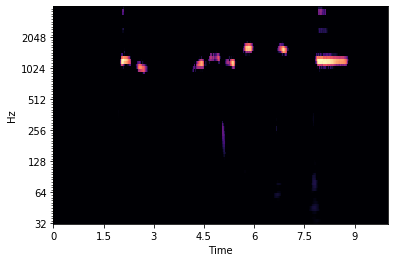

In [25]:

disp.specshow(librosa.amplitude_to_db(C**2), x_axis = 'time', y_axis = 'cqt_hz')

In [26]:
chroma = librosa.feature.chroma_cqt(C=C, sr=sr)

In [33]:
chroma[:,0]

array([0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.99950368+0.03150219j, 0.        +0.j        ,
       0.        +0.j        , 0.        +0.j        ,
       0.03385554-0.04386403j, 0.        +0.j        ])

C:\Users\jokemjaa\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\display.py:696: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


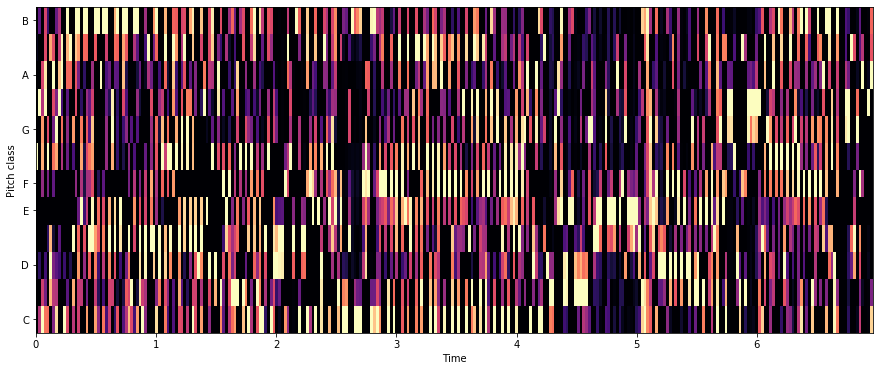

In [32]:
plt.figure(figsize=(15, 6))

start = 0
end = start + 300
arng = range(start, end)
brng = range(start * 512, end * 512)

# disp.specshow(librosa.amplitude_to_db(C[:,arng]**2), x_axis = 'time', y_axis = 'cqt_hz')
disp.specshow(chroma[:,arng], x_axis = 'time', y_axis = 'chroma')

# audio(audioFile)
audio(y[brng], rate=sr)

In [37]:
lenData = data.shape[0]
print(f"lenData {lenData}")
freq = 22050
duration = lenData / freq
print(f"Duration {duration:3.2f}")

min_data = min(data)
delta = max(data) - min(data)

udata = (data - min_data) / delta

frameCount = int(duration * 30)
frameCount


lenData 4975950
Duration 225.67


6770

In [38]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
D.shape

(1025, 9719)

In [39]:
4975950 / 9719

511.981685358576

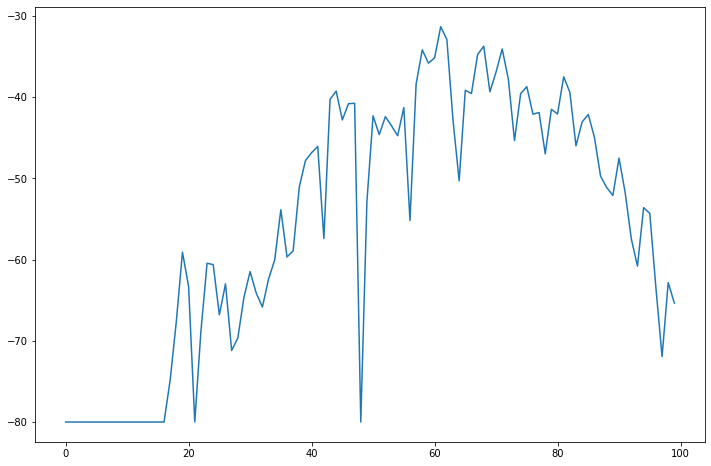

In [46]:
myPlot(D[440][0:100])

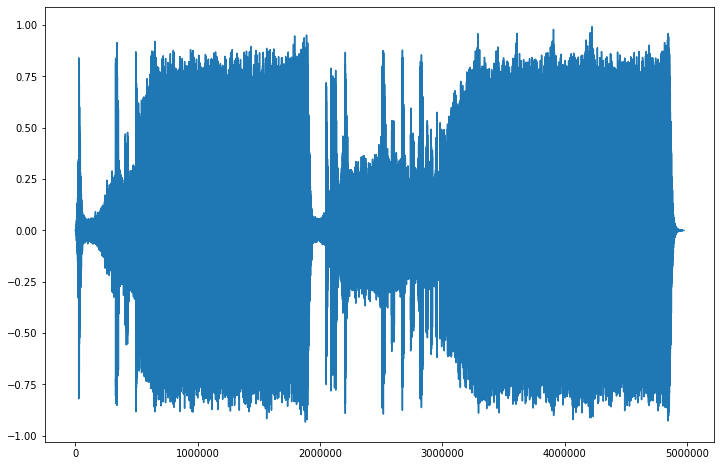

In [16]:
import matplotlib.pyplot as plt

def myPlot(df):
    plt.figure(figsize=(12, 8))
    plt.plot(df)
    plt.show()
    
# myPlot(data[14000:15000])
myPlot(data)

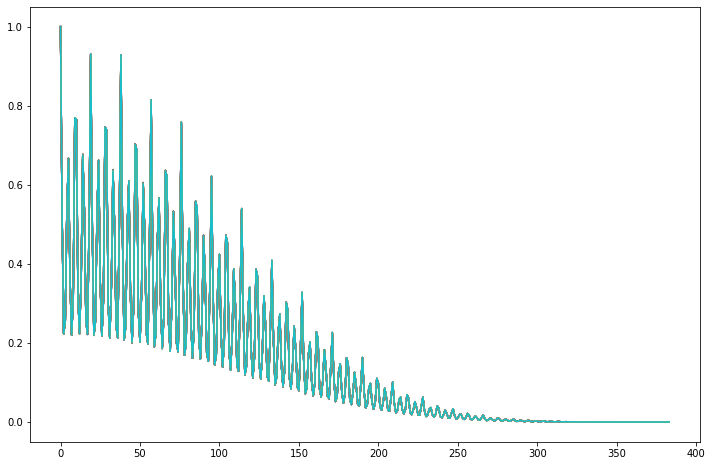

In [17]:
tempogram = librosa.feature.tempogram(data)
# display(f"Temprgram shape {tempogram.shape}")
# myPlot(tempogram[220])
myPlot(tempogram[:,2000:2020])

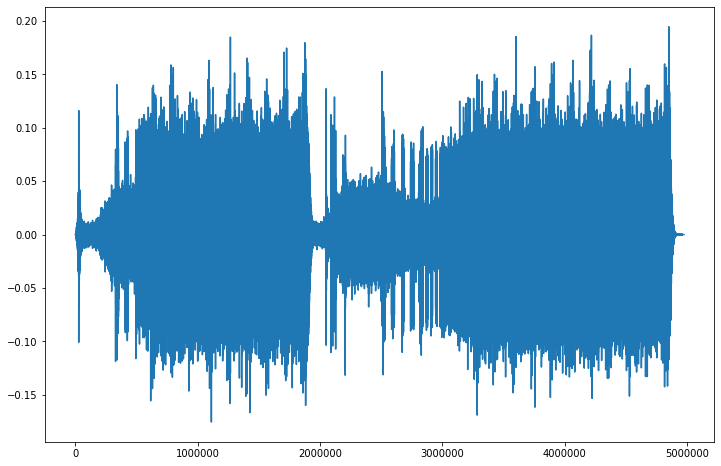

In [19]:
delta = librosa.feature.delta(data, width = 9)
# delta.shape
myPlot(delta)


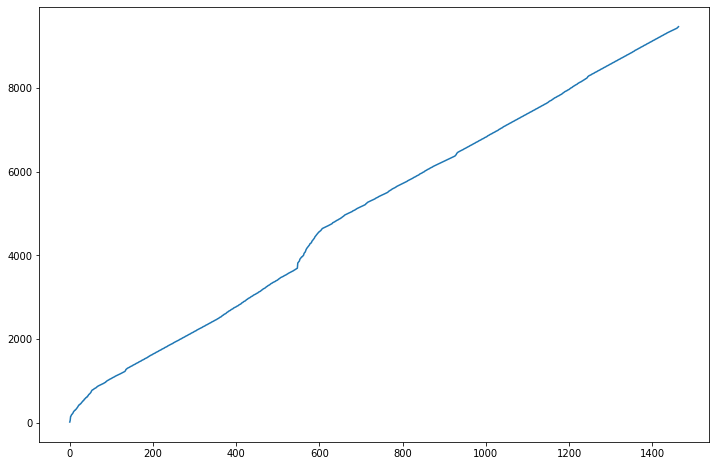

In [20]:
onset_detect = librosa.onset.onset_detect(data, sr = freq)
# onset_detect.shape
myPlot(onset_detect)


KeyboardInterrupt: 

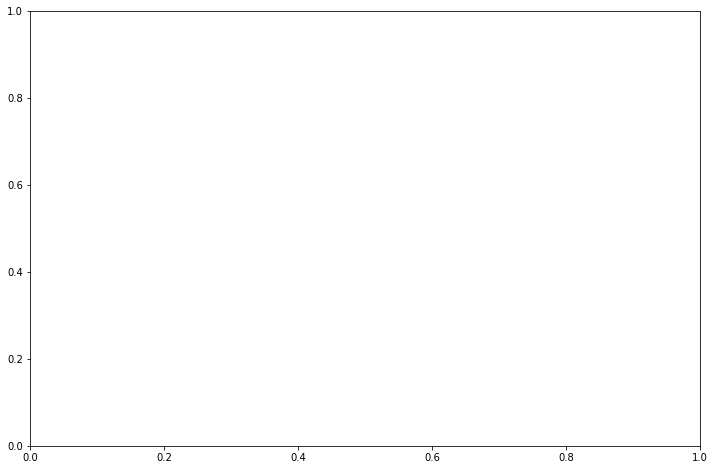

In [193]:
stack_memory = librosa.feature.stack_memory(data)
# stack_memory.shape
myPlot(stack_memory)


(12, 9719)

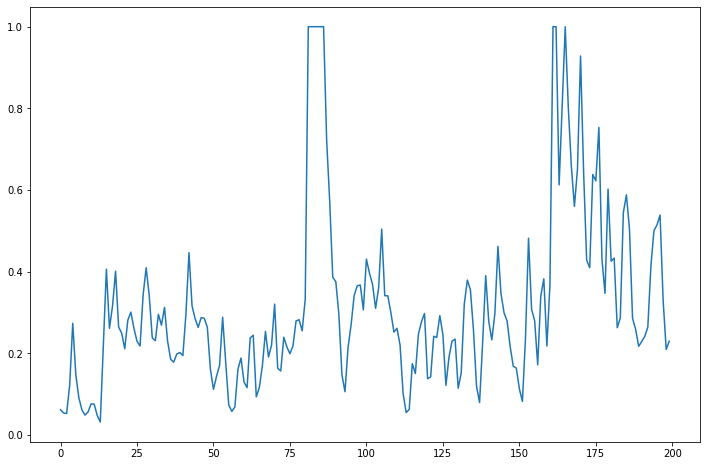

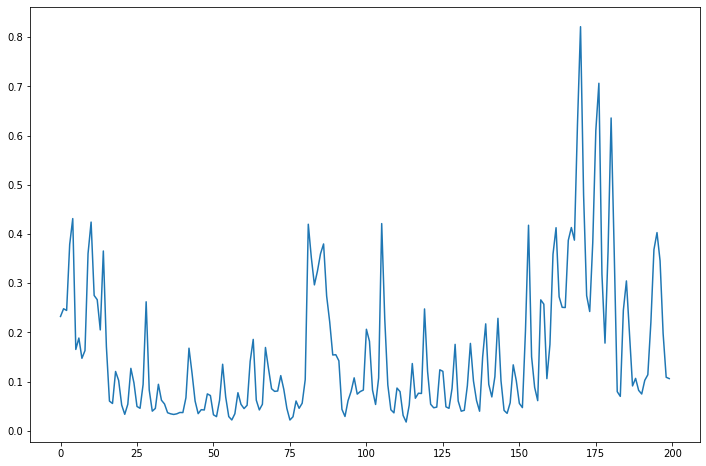

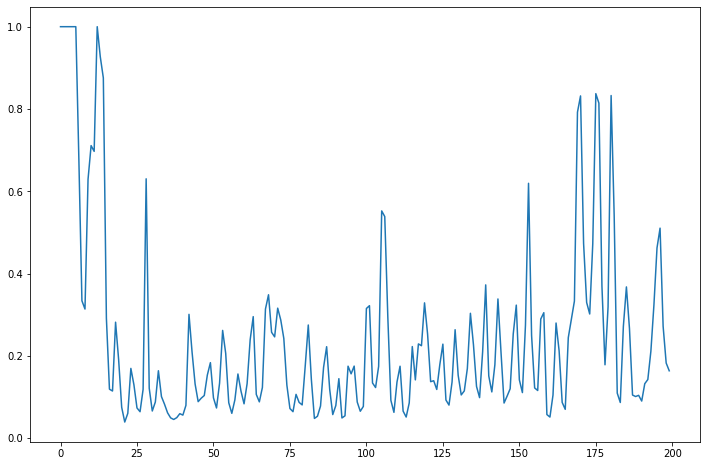

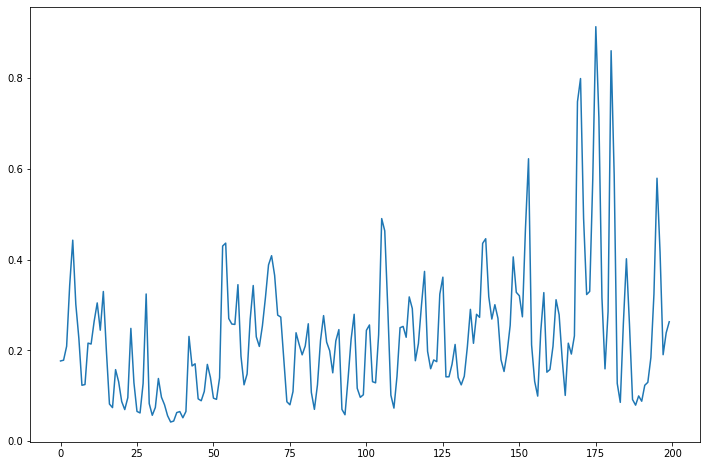

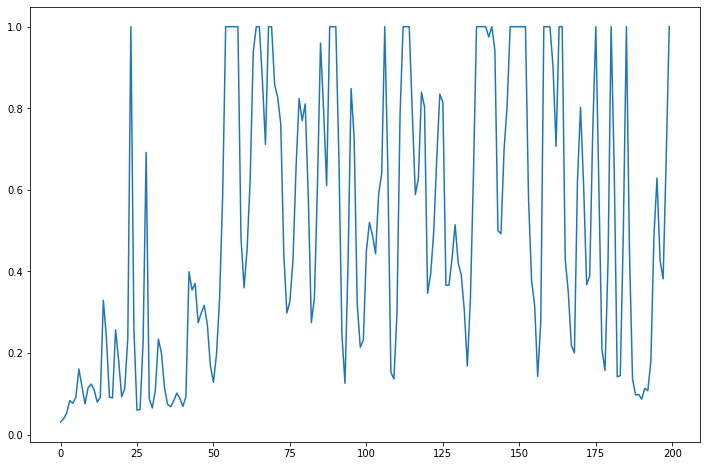

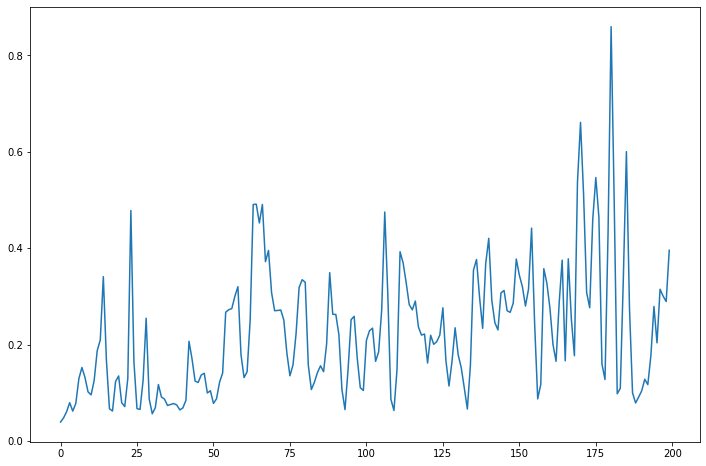

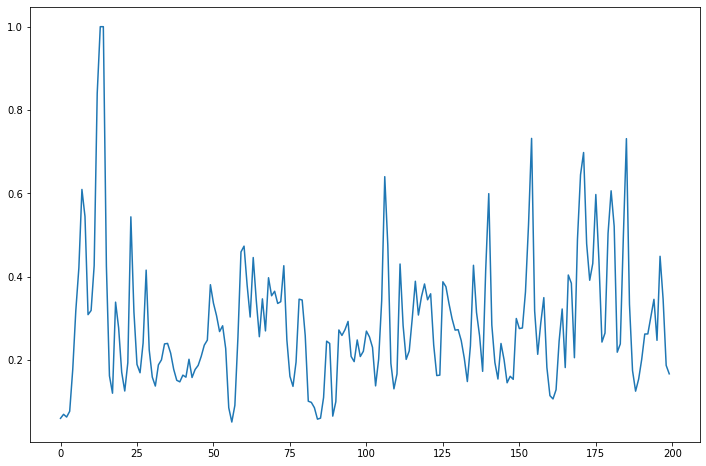

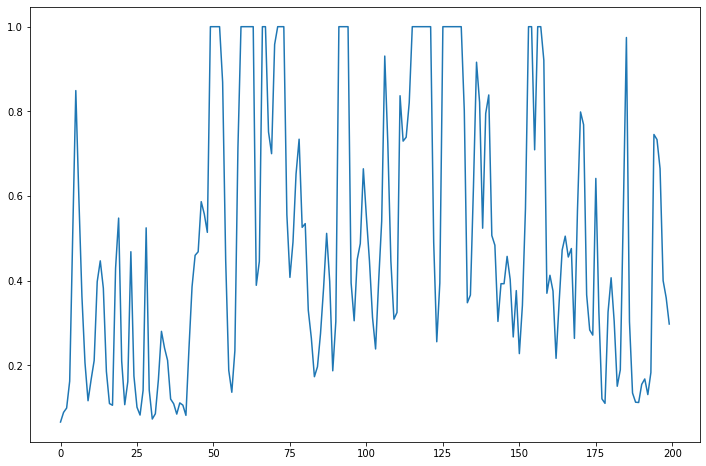

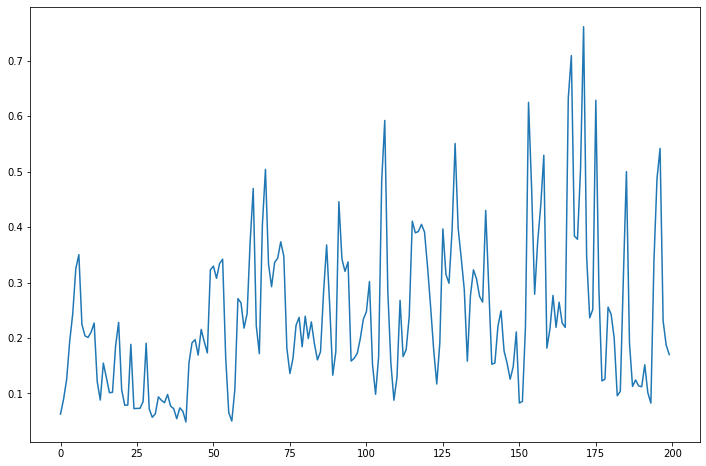

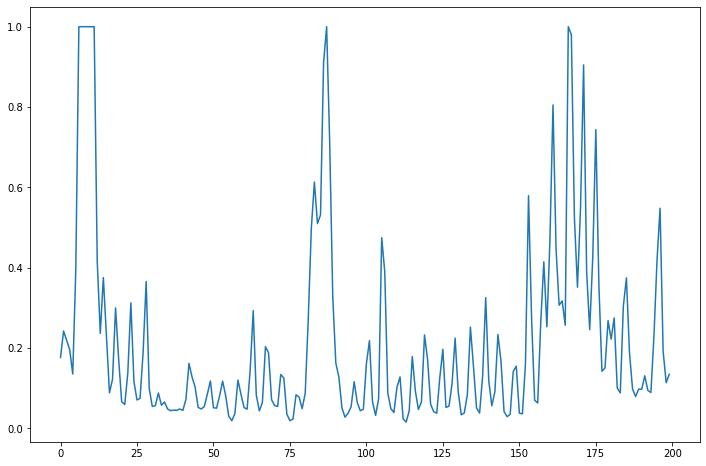

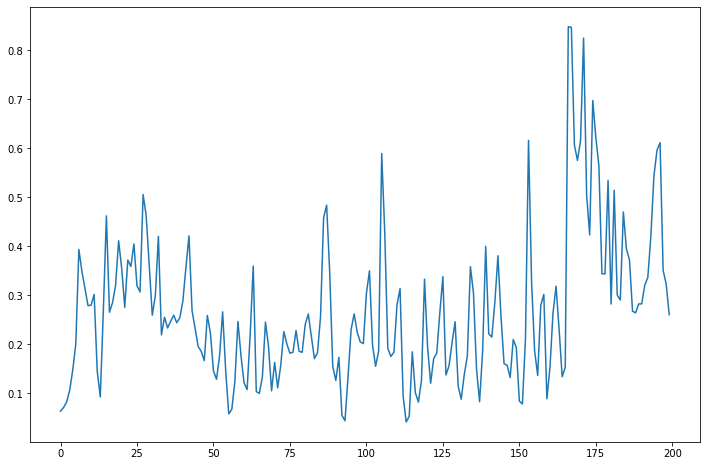

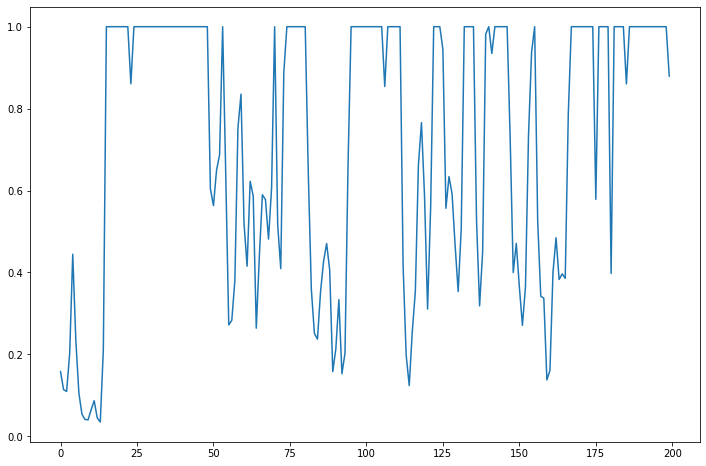

In [21]:
chroma_stft = librosa.feature.chroma_stft(data, sr = freq)
display(chroma_stft.shape)
for i in range(12):
    myPlot(chroma_stft[i][800:1000])


In [ ]:
intervalLen = int(duration / frameCount)
intervalLen

# vdata = udata[:intervalLen * frameCount].reshape(intervalLen, frameCount)
vdata = udata[:intervalLen * frameCount].reshape(frameCount, intervalLen)

In [80]:
pitches, magnitudes = librosa.piptrack(y=data, sr=22050, fmin=75, fmax=1600)

pitch0 = pitches[:,512]

In [88]:
pitches.shape

(1025, 9719)

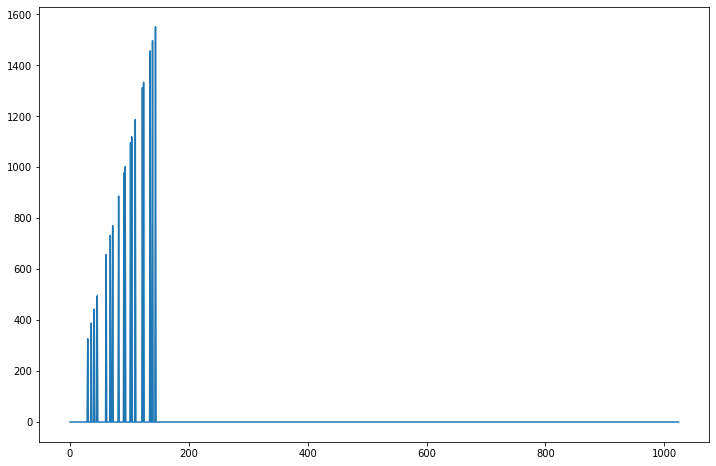

In [82]:
# myPlot(pitch0)


In [92]:
magnitudes_max = np.max(magnitudes, axis = 0)

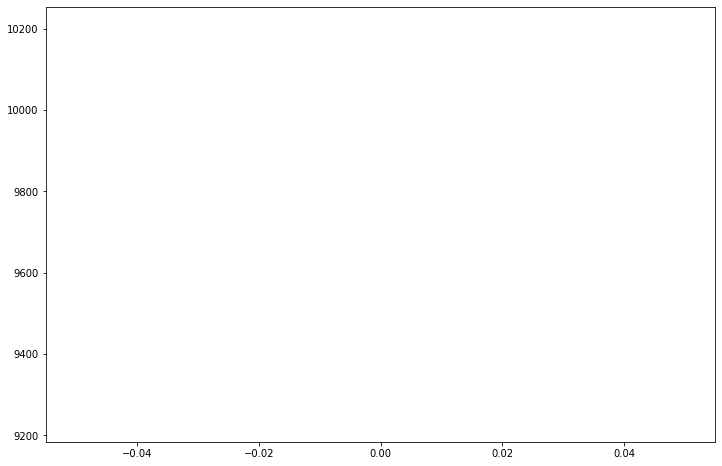

In [95]:
myPlot(magnitudes_max.shape)

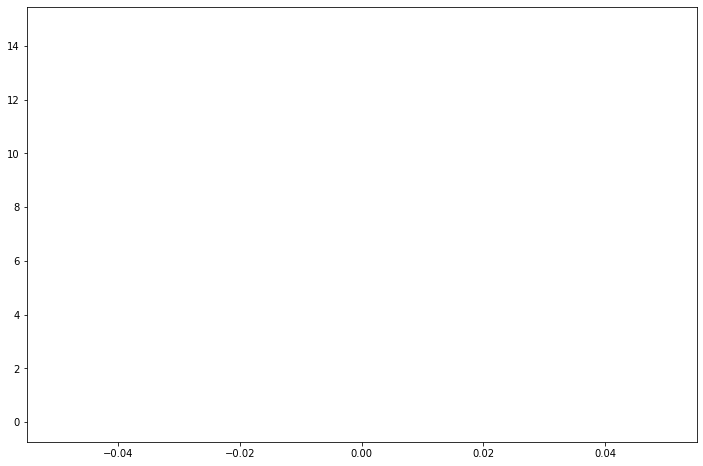

In [87]:
myPlot(magnitudes0)

In [ ]:
plt.plot(pitches[:,7888])

np.argmax(pitches[:,7888])

max_pitches = np.argmax(pitches, axis = 0)
plt.plot(max_pitches)

max_magnitudes = np.mean(magnitudes, axis = 0)
plt.plot(max_magnitudes)

In [47]:
et = librosa.core.estimate_tuning(data)

et

-0.08999999999999997

In [48]:
pt = librosa.core.piptrack(data)
pt

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [53]:
pt[1].shape

(1025, 9719)

In [78]:
max(pt[0][21])

231.46078

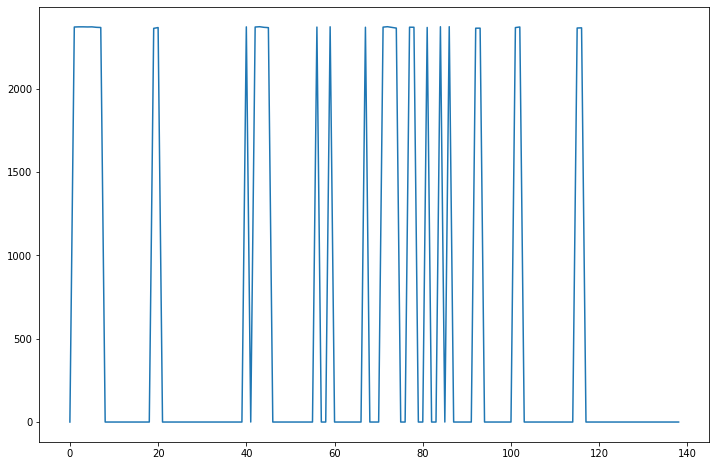

In [71]:
myPlot(pt[0][220][1061:1200])

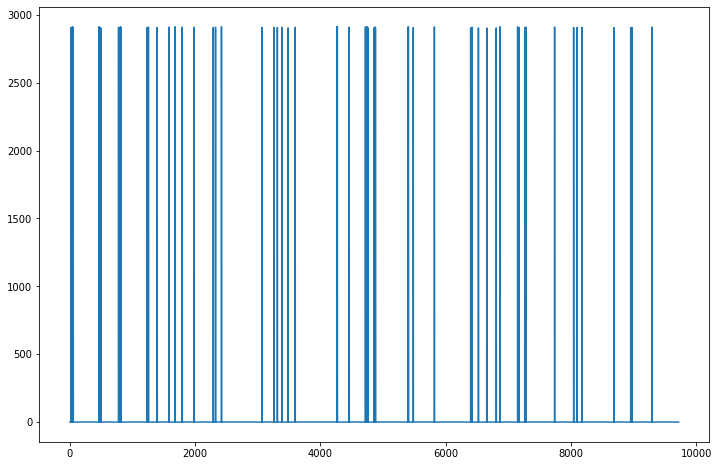

In [61]:
myPlot(pt[0][270])

ValueError: cannot reshape array of size 9961975 into shape (9765175,)

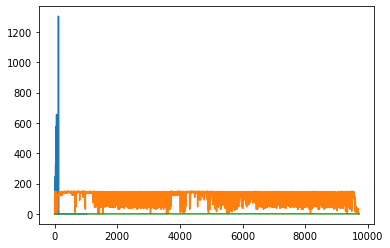

In [22]:
res = magnitudes.shape[0] * magnitudes.shape[0] 

res

max(magnitudes.reshape(9765175))

In [177]:
ret = []
for frameNumber in range(1000,1100):
#     frameData = vdata[frameNumber]
#     frameTempo = librosa.beat.tempo(frameData)
    frameTempo = max(magnitudes[frameNumber])
    ret.append(frameTempo)
plt.plot(ret)

IndexError: index 1025 is out of bounds for axis 0 with size 1025

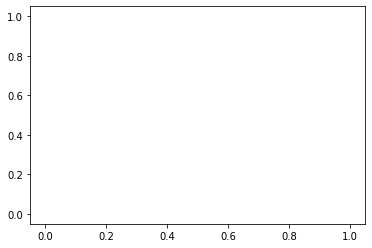

In [25]:
plt.plot(vdata[220])

In [26]:
import numpy as np
hdata = np.max(vdata, axis = 1)
hdata.shape

plt.plot(hdata)

ValueError: zero-size array to reduction operation maximum which has no identity

In [101]:
from PIL import Image

frameModel = np.ones((100, 100, 3), dtype = np.float32)

ims = []
for frameNumber in range(frameCount):
    frame = hdata[frameNumber] * frameModel
    frameIm = frame * 256
    frameIm.astype(np.uint8)
    im = Image.fromarray(frameIm.astype(np.uint8))
    imFile = f"c:/work/output/frame{frameNumber:04d}.png"
    im.save(imFile)
    

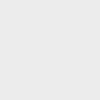

In [55]:
im

[![Anaconda-Server Badge](https://anaconda.org/conda-forge/tabulate/badges/version.svg)](https://anaconda.org/conda-forge/tabulate)

In [ ]:
# %pylab inline

plt.figure(figsize=(12, 8))
plt.plot(data[8000:8100])
plt.show()

In [27]:
 D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)

In [28]:
D.shape

(1025, 9719)

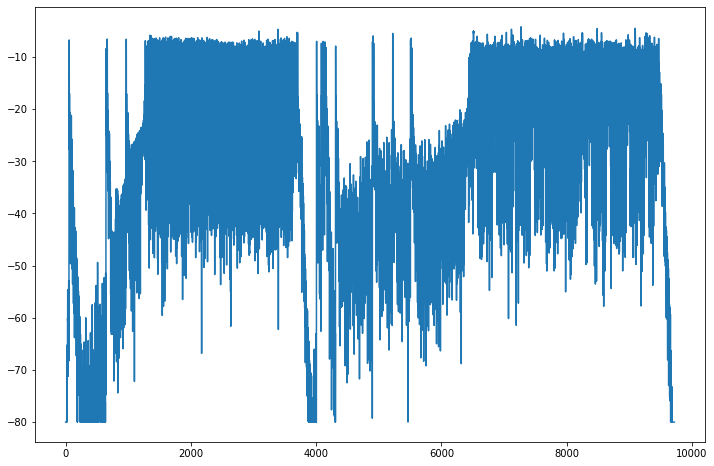

In [33]:
myPlot(D[10][:])

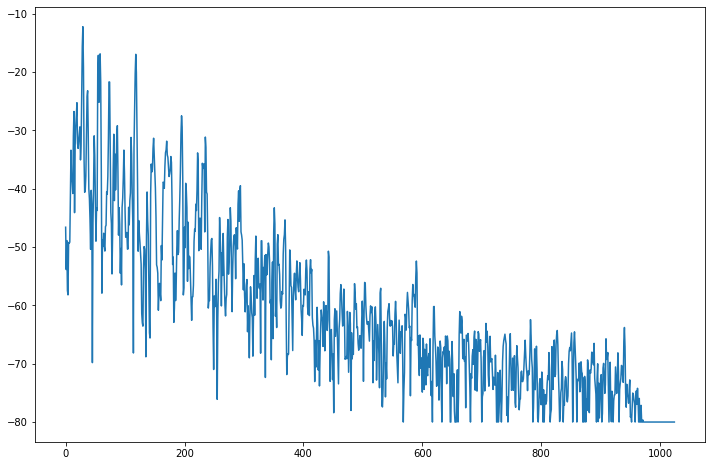

In [178]:
myPlot(D[:,2004])

AttributeError: module 'librosa' has no attribute 'display'

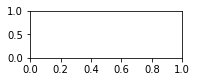

In [35]:
D
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [108]:
librosa.__version__

'0.6.3'

In [125]:
tempo = librosa.beat.beat_track(data)
tempo

librosa.beat.tempo(data)

array([92.28515625])

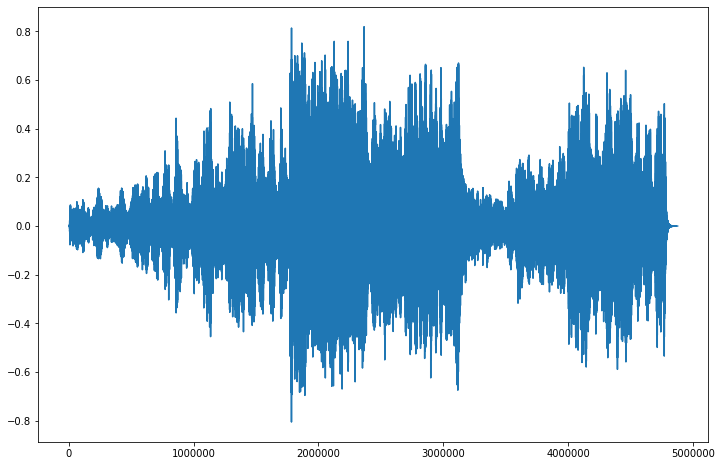

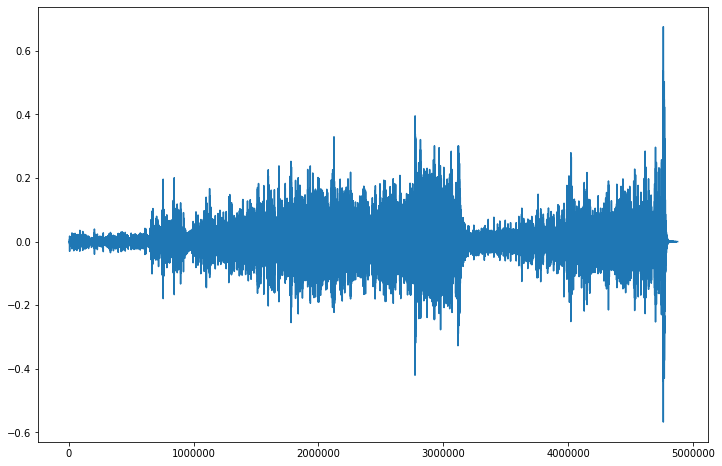

In [127]:
# Separate harmonic and percussive components

hpss = librosa.effects.hpss(data)
hpss

myPlot(hpss[0])
myPlot(hpss[1])

In [ ]:
librosa.effects.harmoni

In [19]:
librosa.output.write_wav(r'C:\Users\jokemjaa\Music\Darude\BeforeTheStorm\harmonic_22050.wav', hpss[1], 22050)

In [20]:
librosa.output.write_wav(r'C:\Users\jokemjaa\Music\Darude\BeforeTheStorm\harmonic_ao_22050.wav', hpss[0], 22050)

In [188]:
oc = librosa.onset.onset_detect(data)
oc.shape

(485,)

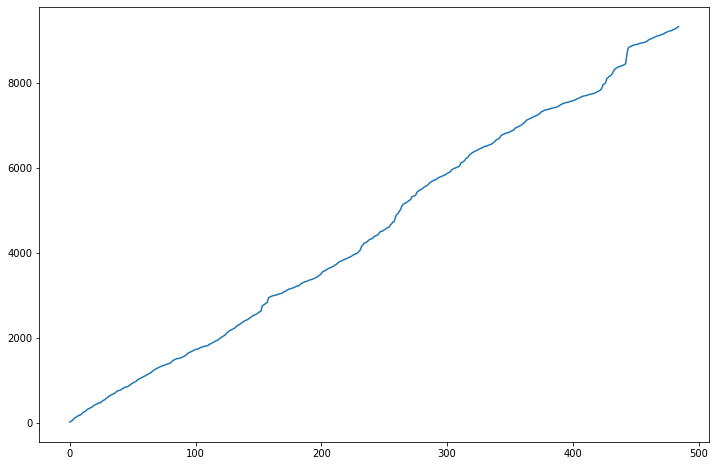

In [189]:
myPlot(oc)

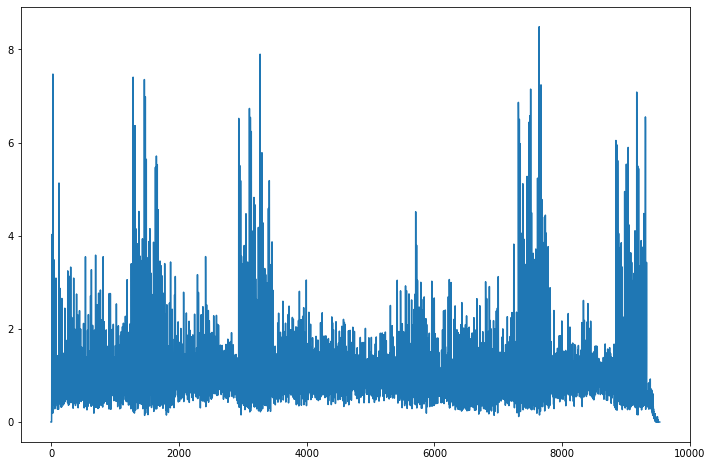

In [187]:
oss = librosa.onset.onset_strength(data)
myPlot(oss)

In [128]:
stft = librosa.core.stft(data)

In [129]:
stft.shape

(1025, 9527)

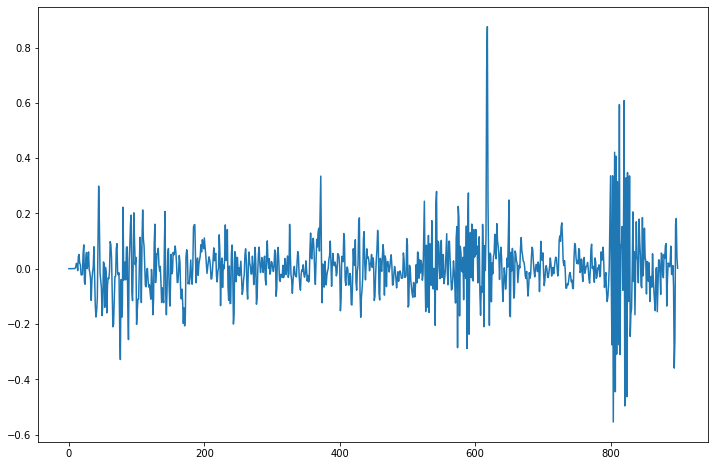

In [131]:
myPlot(stft[100].real[:900])

In [71]:
librosa.core.hz_to_note(440)
fft = librosa.core.spectrum.fft.fft(data)

In [76]:
data.size
freq = np.fft.fftfreq(data.size, d = 0.5)


4975950

In [78]:
librosa.core.fft_frequencies()

array([0.00000000e+00, 1.07666016e+01, 2.15332031e+01, ...,
       1.10034668e+04, 1.10142334e+04, 1.10250000e+04])

In [80]:
librosa.core.get_duration(data)

225.66666666666666

In [81]:
D = np.abs(stft)
D
# array([[2.58028018e-03, 4.32422794e-02, 6.61255598e-01, ...,
# 6.82710262e-04, 2.51654536e-04, 7.23036574e-05],
# [2.49403086e-03, 5.15930466e-02, 6.00107312e-01, ...,
# 3.48026224e-04, 2.35853557e-04, 7.54836728e-05],
# [7.82410789e-04, 1.05394892e-01, 4.37517226e-01, ...,
# 6.29352580e-04, 3.38571583e-04, 8.38094638e-05],
# ...,
# [9.48568513e-08, 4.74725084e-07, 1.50052492e-05, ...,
# 1.85637656e-08, 2.89708542e-08, 5.74304337e-09],
# [1.25165826e-07, 8.58259284e-07, 1.11157215e-05, ...,
# 3.49099771e-08, 3.11740926e-08, 5.29926236e-09],
# [1.70630571e-07, 8.92518756e-07, 1.23656537e-05, ...,
# 5.33256745e-08, 3.33264900e-08, 5.13272980e-09]], dtype=float32)

# Use left-aligned frames, instead of centered frames

D_left = np.abs(librosa.stft(data, center=False))

# Use a shorter hop length

D_short = np.abs(librosa.stft(data, hop_length=64))

# Display a spectrogram

import matplotlib.pyplot as plt
librosa.display.specshow(librosa.amplitude_to_db(D,
                                                 ref=np.max),
                         y_axis='log', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


AttributeError: module 'librosa' has no attribute 'display'

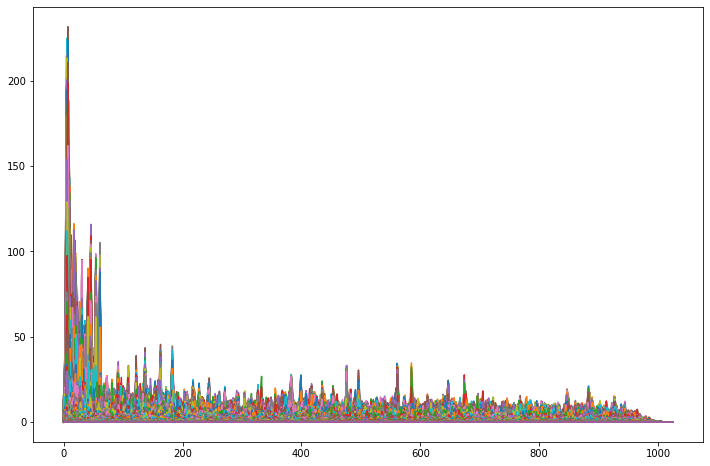

In [82]:
myPlot(D_left)

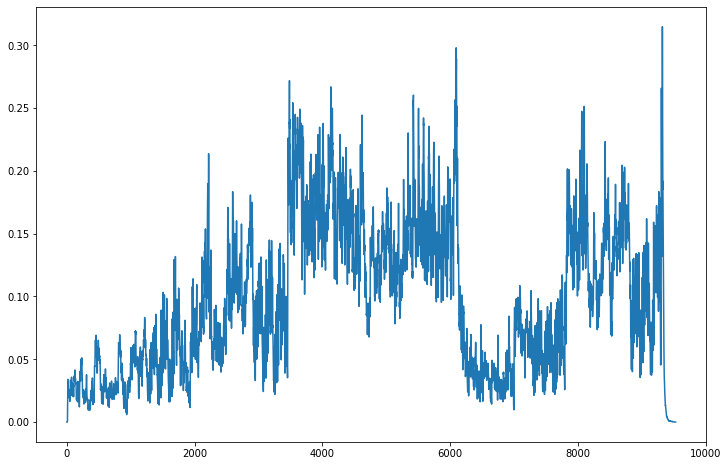

In [132]:
rms = librosa.feature.rms(data)
rms.shape
myPlot(rms[0])

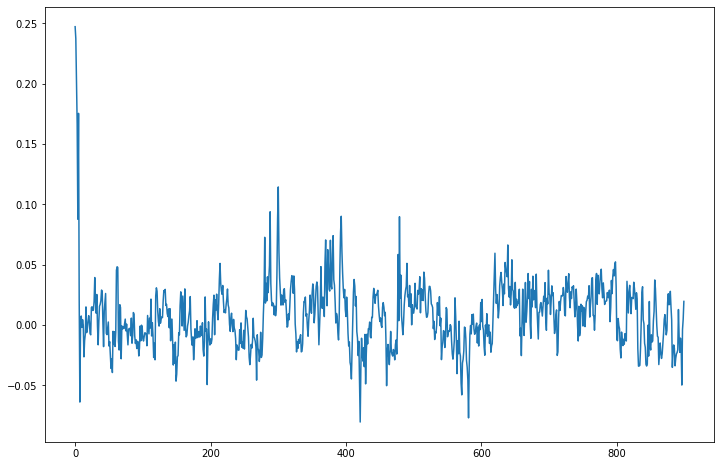

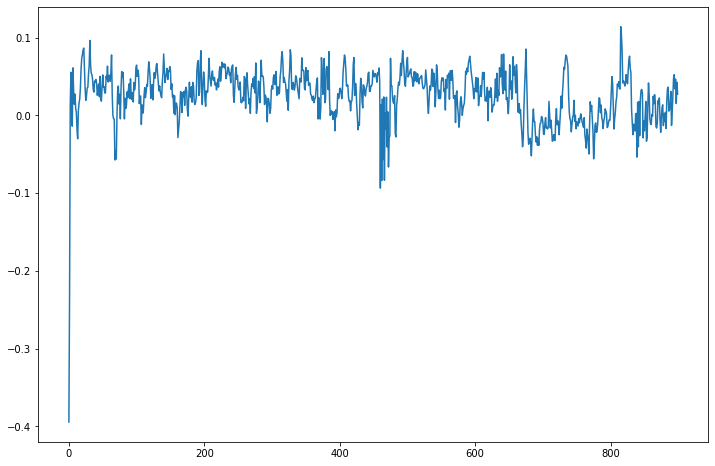

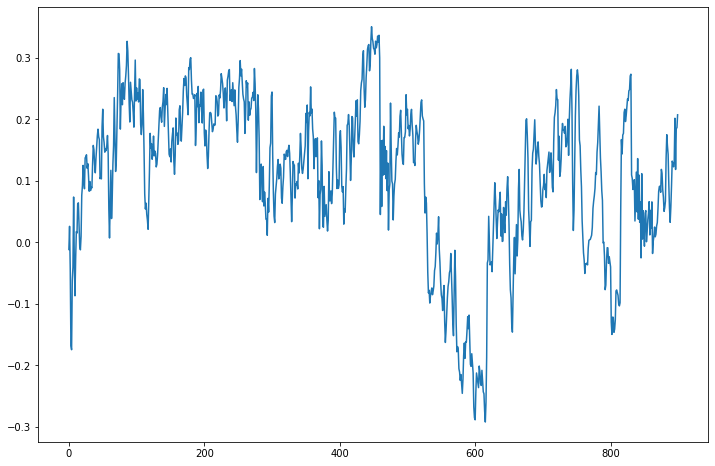

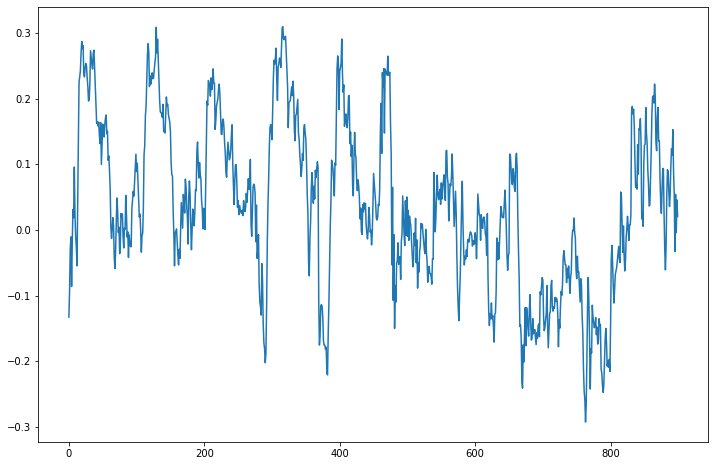

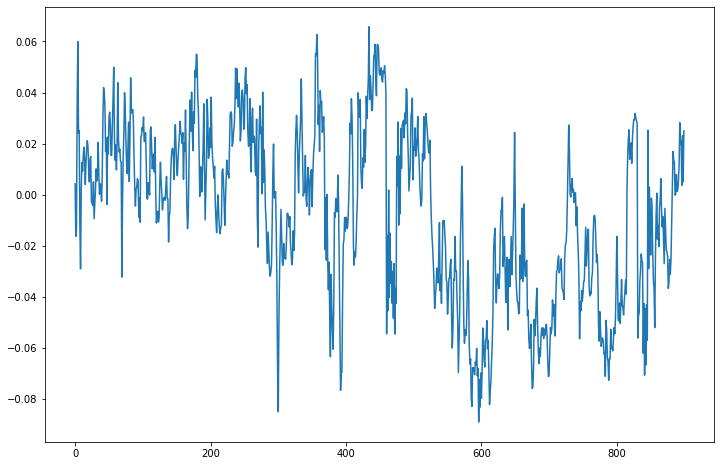

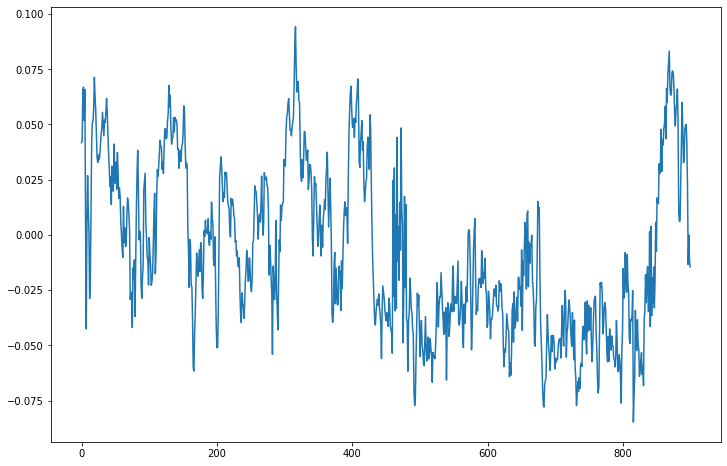

In [133]:
tonnetz = librosa.feature.tonnetz(data)
tonnetz.shape
for i in range(6):
    myPlot(tonnetz[i][:900])

In [18]:
import soundfile as sf

# Get example audio file
filename = r'C:\Users\jokemjaa\Music\Darude\BeforeTheStorm\harmonic.wav'

data, samplerate = sf.read(filename, dtype='float32',)

ModuleNotFoundError: No module named 'soundfile'

In [83]:
librosa.__version__

'0.6.3'

In [15]:
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wav

fs=44100
duration = 5  # seconds
myrecording = sd.rec(duration * fs, samplerate=fs, channels=2,dtype='float64')
print("Recording Audio")
sd.wait()
print("Audio recording complete , Play Audio")
sd.play(myrecording, fs)
sd.wait()
print("Play Audio Complete")

Recording Audio
Audio recording complete , Play Audio
Play Audio Complete


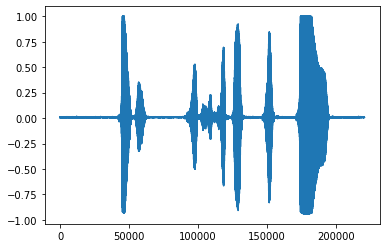

In [16]:
import matplotlib.pyplot as plt

plt.plot(myrecording[:,1])